<a href="https://colab.research.google.com/github/jinseriouspark/pytorch_with_jax/blob/main/pytorch_to_jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transform pytorch to jax

- 활용자료 : https://github.com/hunkim/PyTorchZeroToAll

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Transform pytorch to jax

In [6]:
import pandas as pd

data = pd.read_csv('/content/sample_data/california_housing_train.csv', nrows = 100)
feature_col = 'median_income'
target_col = 'median_house_value'

# 01_basic.py

	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
	 1.0 2.0 1.0 1.0
	 2.0 4.0 2.0 4.0
	 3.0 6.0 3.0 9.0
MSE= 4.666666666666667
	 1.0 2.0 2.0 0.0
	 2.0 4.0 4.0 0.0
	 3.0 6.0 6.0 0.0
MSE= 0.0
	 1.0 2.0 3.0 1.0
	 2.0 4.0 6.0 4.0
	 3.0 6.0 9.0 9.0
MSE= 4.666666666666667


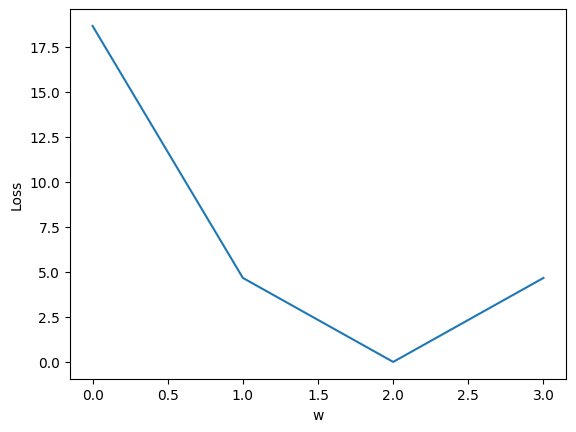

In [7]:
# 01_basic.py
import numpy as np
import matplotlib.pyplot as plt

#x_data = data[feature_col].values
#y_data = data[target_col].values

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# forward pass
def forward(x):
  return x * w

# loss function
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) **2

# list of weights/mean square Error (MSE) for each input
w_list = []
mse_list = []

for w in np.arange(0.0, 4.0, 1.0):
  l_sum = 0
  for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    l = loss(x_val, y_val)
    l_sum += l

    print('\t', x_val, y_val, y_pred_val, l)
  print('MSE=', l_sum/ len(x_data)) # 직접 평균 계산
  w_list.append(w)
  mse_list.append(l_sum / len(x_data))
# Plot it all
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

## 01_basic with jax

Epoch 1, Loss 3.836207151412964
Epoch 11, Loss 0.5405738353729248
Epoch 21, Loss 0.0761740654706955
Epoch 31, Loss 0.01073399931192398
Epoch 41, Loss 0.0015125819481909275
Epoch 51, Loss 0.00021314274636097252
Epoch 61, Loss 3.003445999638643e-05
Epoch 71, Loss 4.233250365359709e-06
Epoch 81, Loss 5.96372842665005e-07
Epoch 91, Loss 8.396483508477104e-08
0:00:02.927140


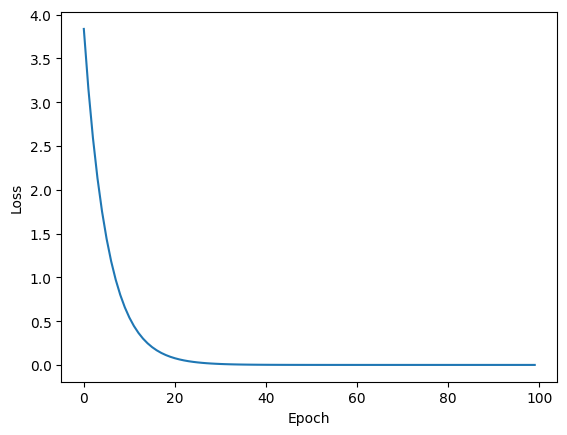

In [8]:
# 01_basic with jax
## jax.numpy as jnp , from jax import grad, jnp.mean() 등을 사용

import datetime
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt

start_time = datetime.datetime.now()
# 데이터 정의
x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

# forward pass
def forward(x, w):
  return x * w
# loss
def loss(w, x, y):
  y_pred = forward(x, w)
  return jnp.mean((y_pred - y) **2)

# grad를 계산하는 함수 생성
grad_loss = grad(loss)

# 초기 w 값 설정
w = 1.0

# w업데이트하면서 손실감소
num_epochs = 100
losses = []
lr = 0.01

for epoch in range(num_epochs):
  grad_w = grad_loss(w, x_data, y_data)
  w -= lr * grad_w
  loss_val = loss(w, x_data, y_data)
  losses.append(loss_val)
  if epoch % 10 == 0:
      print(f'Epoch {epoch + 1}, Loss {loss_val}')

end_time = datetime.datetime.now()
print(end_time - start_time)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 02_manual_gradient.py

In [9]:
# training data
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0

# forward pass
def forward(x):
  return x * w

# loss function
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y) # 오차제곱

# compute gradient
def gradient(x, y):
  return 2 * x * (x * w - y)

# before training
print('prediction (before training)', 4, forward(4))

# training loop
for epoch in range(10):
  for x_val, y_val in zip(x_data, y_data):
    grad = gradient(x_val, y_val)
    w = w - 0.01 * grad
    print('\tgrad: ', x_val, y_val, round(grad, 2))
    l = loss(x_val, y_val) # 오차 제곱을 데이터셋 별로 더하여 계산
  print('progress:', epoch, 'w=', round(w, 2), 'loss=', round(1, 2))

#after training
print('predicted score (after training)', 4, forward(4))

prediction (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.23
progress: 0 w= 1.26 loss= 1
	grad:  1.0 2.0 -1.48
	grad:  2.0 4.0 -5.8
	grad:  3.0 6.0 -12.0
progress: 1 w= 1.45 loss= 1
	grad:  1.0 2.0 -1.09
	grad:  2.0 4.0 -4.29
	grad:  3.0 6.0 -8.87
progress: 2 w= 1.6 loss= 1
	grad:  1.0 2.0 -0.81
	grad:  2.0 4.0 -3.17
	grad:  3.0 6.0 -6.56
progress: 3 w= 1.7 loss= 1
	grad:  1.0 2.0 -0.6
	grad:  2.0 4.0 -2.34
	grad:  3.0 6.0 -4.85
progress: 4 w= 1.78 loss= 1
	grad:  1.0 2.0 -0.44
	grad:  2.0 4.0 -1.73
	grad:  3.0 6.0 -3.58
progress: 5 w= 1.84 loss= 1
	grad:  1.0 2.0 -0.33
	grad:  2.0 4.0 -1.28
	grad:  3.0 6.0 -2.65
progress: 6 w= 1.88 loss= 1
	grad:  1.0 2.0 -0.24
	grad:  2.0 4.0 -0.95
	grad:  3.0 6.0 -1.96
progress: 7 w= 1.91 loss= 1
	grad:  1.0 2.0 -0.18
	grad:  2.0 4.0 -0.7
	grad:  3.0 6.0 -1.45
progress: 8 w= 1.93 loss= 1
	grad:  1.0 2.0 -0.13
	grad:  2.0 4.0 -0.52
	grad:  3.0 6.0 -1.07
progress: 9 w= 1.95 loss= 1
predicted score (after trainin

## with jax

In [ ]:
import jax.numpy as jnp
from jax import grad

x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

w = 1.0

def forward(x, w):
  return x * w

def loss(w, x, y):
  y_pred = forward(x, w)
  return jnp.mean((y_pred - y) ** 2)

# gradient 계산,loss 함수를 입력으로 받아들여 그래디언트 계산하는 함수로 반환
grad_loss = grad(loss)

print('prediction (before_training)', forward(4, w))

# training
learning_rate= 0.01
num_epochs = 10

for epoch in range(num_epochs):
  for x_val, y_val in zip(x_data, y_data):
    grad_w = grad_loss(w, x_val, y_val)
    w -= learning_rate * grad_w
    print('\tgrad:', x_val, y_val, round(grad_w, 2))
    loss_val = loss(w, x_val, y_val)
  print('progress:', epoch, 'w=', round(w, 2), 'loss=', round(loss_val, 2))

# 학습 후 예측
print('predicted score (after training):', forward(4, w))

prediction (before_training) 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.8399997
	grad: 3.0 6.0 -16.23
progress: 0 w= 1.26 loss= 4.92
	grad: 1.0 2.0 -1.48
	grad: 2.0 4.0 -5.7999997
	grad: 3.0 6.0 -12.0
progress: 1 w= 1.4499999 loss= 2.69
	grad: 1.0 2.0 -1.09
	grad: 2.0 4.0 -4.29
	grad: 3.0 6.0 -8.87
progress: 2 w= 1.5999999 loss= 1.4699999
	grad: 1.0 2.0 -0.81
	grad: 2.0 4.0 -3.1699998
	grad: 3.0 6.0 -6.56
progress: 3 w= 1.6999999 loss= 0.79999995
	grad: 1.0 2.0 -0.59999996
	grad: 2.0 4.0 -2.34
	grad: 3.0 6.0 -4.85
progress: 4 w= 1.78 loss= 0.44
	grad: 1.0 2.0 -0.44
	grad: 2.0 4.0 -1.73
	grad: 3.0 6.0 -3.58
progress: 5 w= 1.8399999 loss= 0.24
	grad: 1.0 2.0 -0.32999998
	grad: 2.0 4.0 -1.28
	grad: 3.0 6.0 -2.6499999
progress: 6 w= 1.88 loss= 0.13
	grad: 1.0 2.0 -0.24
	grad: 2.0 4.0 -0.95
	grad: 3.0 6.0 -1.9599999
progress: 7 w= 1.91 loss= 0.07
	grad: 1.0 2.0 -0.17999999
	grad: 2.0 4.0 -0.7
	grad: 3.0 6.0 -1.4499999
progress: 8 w= 1.93 loss= 0.04
	grad: 1.0 2.0 -0.13
	grad: 2.0 4.0 -0.52
	

In [ ]:
# 위의 manual gradient 계산할 때는 loss 계산에서 틀린 것이 없었다.

In [ ]:
grad_w, loss_val

(DeviceArray(-1.0708666, dtype=float32, weak_type=True),
 DeviceArray(0.02141885, dtype=float32))

# 03_auto_gradient.py

In [72]:
l.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [73]:
import torch
import pdb

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = torch.tensor([1.0], requires_grad = True)

# forward pass
def forward(x):
  return x * w

# loss function
def loss(y_pred, y_val):
  return (y_pred - y_val) **2

# before training
print('prediction (before training)', 4, forward(4).item())

# training loop
for epoch in range(1):
  for x_val, y_val in zip(x_data, y_data):
    y_pred = forward(x_val) # 1) forward pass
    l = loss(y_pred, y_val) # 2) compute loss
    print(f'{y_pred},{y_val} loss : {l.item()}')
    l.backward() # 3) backpropagation to update weights
    #print('\t grad:', x_val, y_val, w.grad.item())
    w.data = w.data - 0.01 * w.grad.item()

    w.grad.data.zero_()
  print(f'Epoch: {epoch} | loss : {l.item()}')

# after training
print('prediction (after training)', 4, forward(4).item())

prediction (before training) 4 4.0
tensor([1.], grad_fn=<MulBackward0>),2.0 loss : 1.0
tensor([2.0400], grad_fn=<MulBackward0>),4.0 loss : 3.841600179672241
tensor([3.2952], grad_fn=<MulBackward0>),6.0 loss : 7.315943717956543
Epoch: 0 | loss : 7.315943717956543
prediction (after training) 4 5.042752265930176


In [70]:
loss(2.04, 4)

3.8415999999999997

## with jax
- torch 구현보다 예측력이 떨어진다!?

y_pred : 1.0, y_true:2.0
torch loss: 1.0, w grad : -2.0
jax loss: 1.0, y grad: -2.0
jax loss: 1.0, param grad: [-2.]
----------
y_pred : 2.0, y_true:4.0
torch loss: 4.0, w grad : -8.0
jax loss: 4.0, y grad: -4.0
jax loss: 4.0, param grad: [-8.]
----------
y_pred : 3.0, y_true:6.0
torch loss: 9.0, w grad : -18.0
jax loss: 9.0, y grad: -6.0
jax loss: 9.0, param grad: [-18.]
----------


In [153]:
# 수정 전
import jax.numpy as jnp
from jax import grad

x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

w = jnp.array([1.0]) # 당연하게 requires_grad = True 는 없다

def forward(x):
  return x * w

def loss(y_pred, y_val):
  return (y_pred - y_val)**2

learning_rate = 0.01
grad_loss = grad(loss)

print('prediction (before training)', 4, forward(4)[0])

for epoch in range(20):
  for x_val, y_val in zip(x_data, y_data):
    # y_pred = forward(x_val) # 1) forward pass
    #l = loss(y_pred, y_val) # 2) compute loss
    #l.backward() # 3) backpropagation to update weights
    #print('\t grad:', x_val, y_val, w.grad.item())
    y_pred = forward(x_val)
    grad_w = grad_loss(y_pred[0],y_val)
    w -= learning_rate * grad_w
    print('\tgrad: ', x_val, y_val, grad_w)

  print(f'Epoch: {epoch} | Loss: {loss(forward(x_data), y_data)}')

print('prediction (after training)', 4, forward(4)[0], '-> 잘못된 grad() 사용으로 인한 결과물 오류 ')

prediction (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -3.92
	grad:  3.0 6.0 -5.6448
Epoch: 0 | Loss: [0.7820786 3.1283145 7.038707 ]
	grad:  1.0 2.0 -1.7687042
	grad:  2.0 4.0 -3.46666
	grad:  3.0 6.0 -4.99199
Epoch: 1 | Loss: [0.6116468 2.446587  5.5048213]
	grad:  1.0 2.0 -1.564157
	grad:  2.0 4.0 -3.0657477
	grad:  3.0 6.0 -4.4146767
Epoch: 2 | Loss: [0.4783557 1.9134228 4.3052006]
	grad:  1.0 2.0 -1.3832653
	grad:  2.0 4.0 -2.7111998
	grad:  3.0 6.0 -3.9041271
Epoch: 3 | Loss: [0.37411162 1.4964465  3.3670046 ]
	grad:  1.0 2.0 -1.2232933
	grad:  2.0 4.0 -2.397655
	grad:  3.0 6.0 -3.4526234
Epoch: 4 | Loss: [0.29258466 1.1703386  2.6332629 ]
	grad:  1.0 2.0 -1.0818219
	grad:  2.0 4.0 -2.1203709
	grad:  3.0 6.0 -3.0533333
Epoch: 5 | Loss: [0.22882412 0.9152965  2.0594177 ]
	grad:  1.0 2.0 -0.9567113
	grad:  2.0 4.0 -1.875154
	grad:  3.0 6.0 -2.700222
Epoch: 6 | Loss: [0.17895843 0.7158337  1.6106262 ]
	grad:  1.0 2.0 -0.8460696
	grad:  2.0 4.0 -1.6582966
	grad:  3.0

# torch w.grad.data.zeros_() 와 jax.grad(, argnums = (0,1)) 를 비교

In [40]:
# torch, jax 간 같은 loss 함수를 사용함에도 불구하고 사용법에 따라 문제가 발생하는 이유
# grad 를 계산하는 방식이 다름
## torch
# l = loss(y_pred, y_true)
# l.backward()

## jax
# grad_loss=grad(loss)
# grad_loss(y_pred, y_true)


w_torch = torch.tensor([1.0], requires_grad = True)
w_jax = jnp.array([1.0]) # 당연하게 requires_grad = True 는 없다
def forward_torch(x):
    return x * w_torch
def forward_jax(w_jax, x):
    return x * w_jax

def loss(y_pred, y_true):
    return (y_pred - y_true) **2

def loss_fn(params, x, y):
    return jnp.mean((forward_jax(params, x) - y) **2)


x_data_torch = torch.tensor([1.0, 2.0, 3.0], requires_grad=False)
y_data_torch = torch.tensor([2.0, 4.0, 6.0], requires_grad=False)

x_data_jax = jnp.array([1.0, 2.0, 3.0])
y_data_jax = jnp.array([2.0, 4.0, 6.0])

for x_val_t, y_val_t, x_val_j, y_val_j in zip(x_data_torch, y_data_torch, x_data_jax, y_data_jax):

    # torch
    y_pred_torch = forward_torch(x_val_t)
    l = loss(y_pred_torch, y_val_t)
    l.backward()
    print(f'y_pred : {y_pred_torch.item()}, y_true:{y_val_t}')
    print(f'torch loss: {l.item()}, w grad : {w_torch.grad.item()}') # w에 대한 gradient 였음
    w_torch.grad.data.zero_()

    # jax
    y_pred_jax = forward_jax(w_jax, x_val_j)
   #print(f'y_pred : {y_pred_jax[0]}, y_true:{y_val}')
    jax_loss = loss(y_pred_jax[0], y_val_j)
    grad_ = grad_loss(y_pred_jax[0], y_val_j) # 이런 방식으로 gradient 를 구한다면, y에 대한 gradient 가 출력됨
    print(f'jax loss: {jax_loss}, y grad: {grad_}')

    grad2 = jax.grad(loss_fn, argnums=(0, 1))(w_jax, x_val_j, y_val_j)
    # 위와 같은 방식으로 해야만 제대로 weight 에 대한 gradient 를 계산할 수 있음
    print(f'jax loss: {jax_loss}, param grad: {grad2[0]}')
    print('-' * 10)

Array(7.657576, dtype=float32)

In [158]:
# 수정 후
import jax.numpy as jnp
from jax import grad

x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

w = jnp.array([1.0]) # 당연하게 requires_grad = True 는 없다

def forward(x):
  return x * w

def loss(y_pred, y_val):
  return (y_pred - y_val)**2

learning_rate = 0.01

print('prediction (before training)', 4, forward(4)[0])

for epoch in range(20):
  for x_val, y_val in zip(x_data, y_data):
    # y_pred = forward(x_val) # 1) forward pass
    #l = loss(y_pred, y_val) # 2) compute loss
    #l.backward() # 3) backpropagation to update weights
    #print('\t grad:', x_val, y_val, w.grad.item())
    y_pred = forward(x_val)
    grad_w = jax.grad(loss_fn, argnums=(0, 1))(w, x_val, y_val)
    w -= learning_rate * grad_w[0]
    print('\tgrad: ', x_val, y_val, grad_w[0])

  print(f'Epoch: {epoch} | Loss: {loss(forward(x_data), y_data)}')

print('prediction (after training)', 4, forward(4)[0], '->제대로 학습한 결과물 ')

prediction (before training) 4 4.0
	grad:  1.0 2.0 [-2.]
	grad:  2.0 4.0 [-7.84]
	grad:  3.0 6.0 [-16.228802]
Epoch: 0 | Loss: [0.54658216 2.1863286  4.919239  ]
	grad:  1.0 2.0 [-1.4786239]
	grad:  2.0 4.0 [-5.7962055]
	grad:  3.0 6.0 [-11.998146]
Epoch: 1 | Loss: [0.29875213 1.1950085  2.688769  ]
	grad:  1.0 2.0 [-1.0931644]
	grad:  2.0 4.0 [-4.285205]
	grad:  3.0 6.0 [-8.870373]
Epoch: 2 | Loss: [0.16329262 0.65317047 1.4696338 ]
	grad:  1.0 2.0 [-0.80818963]
	grad:  2.0 4.0 [-3.1681032]
	grad:  3.0 6.0 [-6.557974]
Epoch: 3 | Loss: [0.0892528  0.3570112  0.80327564]
	grad:  1.0 2.0 [-0.59750414]
	grad:  2.0 4.0 [-2.3422165]
	grad:  3.0 6.0 [-4.8483896]
Epoch: 4 | Loss: [0.04878404 0.19513616 0.43905652]
	grad:  1.0 2.0 [-0.44174218]
	grad:  2.0 4.0 [-1.7316294]
	grad:  3.0 6.0 [-3.5844727]
Epoch: 5 | Loss: [0.02666449 0.10665795 0.23998016]
	grad:  1.0 2.0 [-0.3265853]
	grad:  2.0 4.0 [-1.2802143]
	grad:  3.0 6.0 [-2.6500454]
Epoch: 6 | Loss: [0.01457433 0.05829733 0.13116899]
	gra

# 05_linear_regression.py

In [ ]:
from torch import nn
import torch
from torch import tensor

x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])

class Model(nn.Module):
  def __init__(self):
    """
    In the constructor we instantiate two nn.Linear module
    """
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1) # one in and one out

  def forward(self, x):
    """
    In the forward function we accept a Variable of input data and
    we must return a Variable of output data.
    We can use Modules defined in the constructor as well as arbitary operators
    on Variables.
    """
    y_pred = self.linear(x)
    return y_pred

In [ ]:
model = Model()

# loss function & optimizer
criterion = torch.nn.MSELoss(reduction = 'sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
# traning loop
for epoch in range(500):
  # forward pass : compute prediction y by passing x to the model
  y_pred = model(x_data)

  # compute and print loss
  loss = criterion(y_pred, y_data)
  print(f'Epoch: {epoch} | Loss: {loss.item()}')

  # zero gradients, backward pass, update the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

# after training
hour_var = tensor([[4.0]])
y_pred = model(hour_var)
print('prediction (after training)', 4, model(hour_var).data[0][0].item())

Epoch: 0 | Loss: 23.98592185974121
Epoch: 1 | Loss: 11.040203094482422
Epoch: 2 | Loss: 5.271928787231445
Epoch: 3 | Loss: 2.6989245414733887
Epoch: 4 | Loss: 1.5484364032745361
Epoch: 5 | Loss: 1.0312860012054443
Epoch: 6 | Loss: 0.796151340007782
Epoch: 7 | Loss: 0.6866306066513062
Epoch: 8 | Loss: 0.6331018209457397
Epoch: 9 | Loss: 0.6045660972595215
Epoch: 10 | Loss: 0.587225079536438
Epoch: 11 | Loss: 0.5749333500862122
Epoch: 12 | Loss: 0.5649558901786804
Epoch: 13 | Loss: 0.5560733675956726
Epoch: 14 | Loss: 0.5477418899536133
Epoch: 15 | Loss: 0.5397184491157532
Epoch: 16 | Loss: 0.5318945646286011
Epoch: 17 | Loss: 0.5242207646369934
Epoch: 18 | Loss: 0.5166733860969543
Epoch: 19 | Loss: 0.5092422366142273
Epoch: 20 | Loss: 0.5019209980964661
Epoch: 21 | Loss: 0.49470603466033936
Epoch: 22 | Loss: 0.48759573698043823
Epoch: 23 | Loss: 0.48058784008026123
Epoch: 24 | Loss: 0.4736814498901367
Epoch: 25 | Loss: 0.4668741226196289
Epoch: 26 | Loss: 0.4601641595363617
Epoch: 27 | 

## with jax
- jax 는 pytorch와 다르게 함수형 프로그램을 강조하고 있음 (class 가 필요없음)
- 모델과 관련된 파라미터와 계산을 함수로 구현하여 사용하는 것이 일반적임


### 변경사항
  - loss 를 optax 내장함수로 바꾸어줌
  - opimizer 가 2줄짜리로 변경 : opt_state, params 업데이트 필요

### optax 를 사용한 최적화 코드

[참고자료](https://optax.readthedocs.io/en/latest/api/optimizers.html#optax.sgd)

```
# optax.sgd 를 활용해 optimizer 를 초기화 할때, params 가 jax 배열이 아니기때문에 오류가 발생
optimizer = optax.sgd(learning_rate = 0.01)

# 아래와 같이 한번 init 해주어야함
opt_state = optimizer.init(params)


# optimizer 를 활용해 업데이트를 하면 opt_state 가 업데이트 되며,
# 이를 다시 apply_updates 로 처리해서 실제 업데이트도 진행
updates, opt_state = optimizer.update(grads, opt_state, params)
params = optax.apply_updates(params, updates)

```


Q. jit 을 gradient 계산하는 부분에 적용하기 위해서는 어떻게 해야 하는가?


chat gpt 설명
```
@jit
def value_and_grad(params, x, y):
    return jax.value_and_grad(loss)(params, x, y)
```


In [ ]:
import jax.numpy as jnp
from jax import grad, jit
import optax

x_data = jnp.array([[1.0], [2.0], [3.0]])
y_data = jnp.array([[2.0], [4.0], [6.0]])

# define model
def model(params, x):
  return jnp.dot(x, params['weight']) + params['bias']

# define loss(params)
def loss(params, x, y):
  y_pred = model(params, x)
  return jnp.mean((y_pred - y) ** 2)

# gradient computation
grad_loss = grad(loss)

# initialize parameters
init_params = {'weight': jnp.array([[1.0]]), 'bias': jnp.array([0.0])}

# initialize optimizer


In [ ]:
import jax
import jax.numpy as jnp
from jax import grad, jit
import optax

# Define data
x_data = jnp.array([[1.0], [2.0], [3.0]])
y_data = jnp.array([[2.0], [4.0], [6.0]])

# Define model
def model(params, x):
    return jnp.dot(x, params['weight']) + params['bias']

# Loss function
def loss(params, x, y):
    y_pred = model(params, x)
    return jnp.mean((y_pred - y) ** 2)

# Gradient computation
grad_loss = grad(loss)

# Initialize parameters
init_params = {'weight': jnp.array([[1.0]]), 'bias': jnp.array([0.0])}

# Initialize optimizer
optimizer = optax.sgd(learning_rate=0.01)

@jit
def update(params, opt_state, x, y):
    grads = grad_loss(params, x, y)
    updates, opt_state = optimizer.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, opt_state

# Initialize optimizer state
opt_state = optimizer.init(init_params)

# Training loop
num_epochs = 500
params = init_params

for epoch in range(num_epochs):
    params, opt_state = update(params, opt_state, x_data, y_data)
    loss_val = loss(params, x_data, y_data)
    print(f'Epoch: {epoch} | Loss: {loss_val}')

# After training
hour_var = jnp.array([[4.0]])
y_pred = model(params, hour_var)
print("Prediction (after training):", 4, y_pred[0][0])


Epoch: 0 | Loss: 3.6927404403686523
Epoch: 1 | Loss: 2.9228854179382324
Epoch: 2 | Loss: 2.3143362998962402
Epoch: 3 | Loss: 1.8332923650741577
Epoch: 4 | Loss: 1.4530338048934937
Epoch: 5 | Loss: 1.1524405479431152
Epoch: 6 | Loss: 0.9148194193840027
Epoch: 7 | Loss: 0.7269737720489502
Epoch: 8 | Loss: 0.5784738659858704
Epoch: 9 | Loss: 0.46107369661331177
Epoch: 10 | Loss: 0.36825668811798096
Epoch: 11 | Loss: 0.2948717176914215
Epoch: 12 | Loss: 0.23684683442115784
Epoch: 13 | Loss: 0.19096308946609497
Epoch: 14 | Loss: 0.15467634797096252
Epoch: 15 | Loss: 0.1259755939245224
Epoch: 16 | Loss: 0.1032714694738388
Epoch: 17 | Loss: 0.08530738204717636
Epoch: 18 | Loss: 0.07108993083238602
Epoch: 19 | Loss: 0.05983422324061394
Epoch: 20 | Loss: 0.05091980844736099
Epoch: 21 | Loss: 0.04385606199502945
Epoch: 22 | Loss: 0.03825516626238823
Epoch: 23 | Loss: 0.03381074592471123
Epoch: 24 | Loss: 0.0302805807441473
Epoch: 25 | Loss: 0.027473006397485733
Epoch: 26 | Loss: 0.02523679845035

# 06_logistic_regression.py

In [ ]:
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim

# dataset
x_data = tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = tensor([[0.], [0.], [1.], [1.]])

class Model(nn.Module):
  def __init__(self):
    """
    instantiate nn.Linear Module
    """
    super(Model, self).__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    y_pred = sigmoid(self.linear(x))
    return y_pred

# out model
model = Model()

# loss function & optimizer contruction
# call to model.parameters()
criterion = nn.BCELoss(reduction = 'mean')
optimizer = optim.SGD(model.parameters(), lr = 0.01)


#Traning loop
for epoch in range(1000):
  # forward pass : compute predicted y by passing x to the model
  y_pred = model(x_data)

  # compute and print loss
  loss = criterion(y_pred, y_data)
  print(f'Epoch {epoch + 1}/1000 | Loss: {loss.item():.4f}')

  #zero gradient, perform a backward pass, update the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

#After training
print(f'\nLet\'s predict the hours need to score above 50%\n{"=" * 50}')
hour_var = model(tensor([[1.0]]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() > 0.5}')
hour_var = model(tensor([[7.0]]))
print(f'Prediction after 7 hours of training: {hour_var.item():.4f} | Above 50%: { hour_var.item() > 0.5}')

Epoch 1/1000 | Loss: 0.7630
Epoch 2/1000 | Loss: 0.7591
Epoch 3/1000 | Loss: 0.7552
Epoch 4/1000 | Loss: 0.7514
Epoch 5/1000 | Loss: 0.7477
Epoch 6/1000 | Loss: 0.7439
Epoch 7/1000 | Loss: 0.7403
Epoch 8/1000 | Loss: 0.7366
Epoch 9/1000 | Loss: 0.7330
Epoch 10/1000 | Loss: 0.7295
Epoch 11/1000 | Loss: 0.7259
Epoch 12/1000 | Loss: 0.7225
Epoch 13/1000 | Loss: 0.7190
Epoch 14/1000 | Loss: 0.7156
Epoch 15/1000 | Loss: 0.7122
Epoch 16/1000 | Loss: 0.7089
Epoch 17/1000 | Loss: 0.7056
Epoch 18/1000 | Loss: 0.7024
Epoch 19/1000 | Loss: 0.6992
Epoch 20/1000 | Loss: 0.6960
Epoch 21/1000 | Loss: 0.6929
Epoch 22/1000 | Loss: 0.6898
Epoch 23/1000 | Loss: 0.6868
Epoch 24/1000 | Loss: 0.6838
Epoch 25/1000 | Loss: 0.6808
Epoch 26/1000 | Loss: 0.6779
Epoch 27/1000 | Loss: 0.6750
Epoch 28/1000 | Loss: 0.6721
Epoch 29/1000 | Loss: 0.6693
Epoch 30/1000 | Loss: 0.6666
Epoch 31/1000 | Loss: 0.6638
Epoch 32/1000 | Loss: 0.6611
Epoch 33/1000 | Loss: 0.6585
Epoch 34/1000 | Loss: 0.6559
Epoch 35/1000 | Loss: 0

## with jax


In [ ]:
import jax
import jax.numpy as jnp
from jax import jit
import optax

x_data = jnp.array([[1.0], [2.0], [3.0], [4.0]])
y_data = jnp.array([[0.], [0.], [1.], [1.]])

# defind model
def model(params, x): # 이 부분에서, init_params 에서 받은 값들을
  return jax.nn.sigmoid(jnp.dot(x, params['weight']) + params['bias'])

def loss(params, x, y):
  y_pred = model(params, x)
  return optax.sigmoid_binary_cross_entropy(y_pred, y).mean()

# value and gradient computation


# Initialize parameters
key = jax.random.PRNGKey(0)  # Define random key
init_params = {
    'weight': jax.random.normal(key, (1, 1)),
    'bias': jax.random.normal(key, (1,))
}
optimizer = optax.sgd(learning_rate = 0.01)
# optax.sgd 를 활용해 optimizer 를 초기화 할때, params 가 jax 배열이 아니기때문에 오류가 발생
opt_state = optimizer.init(params)

num_epochs = 1000
params = init_params

@jit
# def value_and_grad(params, x, y):
#     return jax.value_and_grad(loss)(params, x, y)

for epoch in range(num_epochs):

  # jit으로 선언한 함수를 사용할 떄
  # loss_val, grads = value_and_grad(params,x_data, y_data)

  loss_val, grads = jax.value_and_grad(loss)(params,x_data, y_data)
  #print(params)
  updates, opt_state = optimizer.update(grads, opt_state, params)
  params = optax.apply_updates(params, updates)
  #print(params)
  print(f'Epoch {epoch + 1}/{num_epochs} | loss : {loss_val}')

SyntaxError: invalid syntax (<ipython-input-80-cb8e6c0d82b8>, line 37)

## 07_diabets_logistic.py

In [ ]:
from torch import nn, optim, from_numpy
import numpy as np

xy = np.loadtxt('/content/drive/MyDrive/google_jax/data/diabetes.csv.gz', delimiter=',', dtype = np.float32)
x_data = from_numpy(xy[:, 0: -1])
y_data = from_numpy(xy[:, [-1]])

print(f'X\'s shape: {x_data.shape} | Y\'s shape: {y_data.shape}')

X's shape: torch.Size([759, 8]) | Y's shape: torch.Size([759, 1])


In [ ]:
import jax.numpy as jnp
import numpy as np
import optax
import jax

# define model using flax
import flax.linen as nn

@nn.compact
class Model(nn.Module):
    def setup(self):
        self.l1 = nn.Dense(6)
        self.l2 = nn.Dense(4)
        self.l3 = nn.Dense(1)

    def __call__(self, x):
        out1 = nn.sigmoid(self.l1(x))
        out2 = nn.sigmoid(self.l2(out1))
        y_pred = nn.sigmoid(self.l3(out2))
        return y_pred

model = Model()


In [ ]:
model

Model()

In [ ]:
# Define loss function
def loss_fn(params, model, batch):
    inputs, targets = batch
    logits = model.apply({"params": params}, inputs)
    return jnp.mean(jax.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=targets))

# Initialize model parameters
rng = jax.random.PRNGKey(0)
params = model.init(rng, jnp.ones((1, 8), dtype=jnp.float32))

In [ ]:
params

FrozenDict({
    params: {
        l1: {
            kernel: DeviceArray([[-0.36620265, -0.28757483,  0.5535811 , -0.13558859,
                          -0.41631603,  0.54938847],
                         [ 0.4399298 ,  0.3729127 ,  0.47254488,  0.08311932,
                           0.20160902, -0.03585215],
                         [-0.4550131 , -0.16402927,  0.46358654, -0.2197457 ,
                          -0.07501189,  0.10366119],
                         [ 0.554131  ,  0.6856542 ,  0.40352252, -0.44767907,
                           0.16142297,  0.23764141],
                         [ 0.26231918, -0.03894472, -0.42013368,  0.1577048 ,
                          -0.320385  , -0.25536203],
                         [ 0.29287338, -0.50183195,  0.07120508,  0.25253683,
                          -0.32684764,  0.4308775 ],
                         [ 0.35276017,  0.15336749,  0.4077243 ,  0.49453962,
                          -0.33912134, -0.09362802],
                         [-0.06506

In [ ]:
i



# Initialize optimizer
optimizer = optax.sgd(learning_rate=0.1)
optimizer_state = optimizer.init(params)

# Define training step
@jax.jit
def train_step(optimizer_state, batch):
    params = optimizer_state
    grads = jax.grad(loss_fn)(params, model, batch)
    updates, new_optimizer_state = optimizer.update(grads, optimizer_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, new_optimizer_state

# Define data loader function
def data_loader(x_data, y_data, batch_size=32, shuffle=True):
    num_samples = len(x_data)
    indices = jax.random.permutation(rng, num_samples)
    for i in range(0, num_samples, batch_size):
        batch_indices = indices[i:i+batch_size]
        yield x_data[batch_indices], y_data[batch_indices]

# Training loop
num_epochs = 100
batch_size = 32
for epoch in range(num_epochs):
    for batch in data_loader(x_data, y_data, batch_size=batch_size):
        optimizer_state, _ = train_step(optimizer_state, batch)


ApplyScopeInvalidVariablesTypeError: The first argument passed to an apply function should be a dictionary of collections. Each collection should be a dictionary with string keys. (https://flax.readthedocs.io/en/latest/api_reference/flax.errors.html#flax.errors.ApplyScopeInvalidVariablesTypeError)